# EMT Basic Functionalities

## Table of Contents
* Initialize EPANET Python Toolkit (EPyT)
* Data and Methods in Toolkit
* Need help?
* Plot network topology
* Getting information from links (pipes, pumps, valves)
* Getting information from nodes (junctions, tanks, reservoirs)
* Demands
* Change parameters in network
* Patterns
* Simulation options



## Initialize EPANET Python Toolkit (EPyT)

### You should always begin with this command to import the toolkit.

In [2]:
from epyt import epanet

### Load a benchmark network
### Decide which benchmark network to use and load the network

In [3]:
# decide which network to load from the "/networks/" folder  
filename = 'L-TOWN.inp' #you can also try 'net2-cl2.inp', 'Net3.inp', etc.
#filename = 'net2-cl2.inp'

#call epanet class and load all data and functions in G structure
G = epanet(filename)

EPANET version 20200 loaded (EPyT version 1.1.6).
Input File L-TOWN.inp loaded successfully.


## Data and Methods in Toolkit

### Description and code for data and methods in the toolkit.

In [4]:
dir(G)

['BinTempfile',
 'CMDCODE',
 'ControlLevelValues',
 'ControlLinkIndex',
 'ControlNodeIndex',
 'ControlRulesCount',
 'ControlSettings',
 'ControlTypes',
 'ControlTypesIndex',
 'Controls',
 'CurveCount',
 'CurveIndex',
 'CurvesInfo',
 'DEMANDMODEL',
 'EnergyEfficiencyUnits',
 'EnergyUnits',
 'InputFile',
 'Iterations',
 'LOGOP',
 'LibEPANET',
 'LibEPANETpath',
 'LinkBulkReactionCoeff',
 'LinkCount',
 'LinkDiameter',
 'LinkFlowUnits',
 'LinkFrictionFactorUnits',
 'LinkIndex',
 'LinkInitialSetting',
 'LinkInitialStatus',
 'LinkLength',
 'LinkLengthsUnits',
 'LinkMinorLossCoeff',
 'LinkMinorLossCoeffUnits',
 'LinkNameID',
 'LinkPipeCount',
 'LinkPipeDiameterUnits',
 'LinkPipeIndex',
 'LinkPipeNameID',
 'LinkPipeRoughnessCoeffUnits',
 'LinkPumpCount',
 'LinkPumpHeadCurveIndex',
 'LinkPumpIndex',
 'LinkPumpNameID',
 'LinkPumpPatternIndex',
 'LinkPumpPatternNameID',
 'LinkPumpPower',
 'LinkPumpPowerUnits',
 'LinkPumpType',
 'LinkPumpTypeCode',
 'LinkRoughnessCoeff',
 'LinkType',
 'LinkTypeInde

### What methods/functions are in the toolkit? 

In [5]:
methods_dir = [method for method in dir(G) if callable(getattr(G, method)) and not method.startswith('__')and not method.startswith('_')]
print("Methods using dir():", methods_dir)

Methods using dir(): ['EnergyEfficiencyUnits', 'EnergyUnits', 'LinkFrictionFactorUnits', 'LinkLengthsUnits', 'LinkMinorLossCoeffUnits', 'LinkPipeDiameterUnits', 'LinkPipeRoughnessCoeffUnits', 'LinkPumpPowerUnits', 'LinkVelocityUnits', 'NodeDemandUnits', 'NodeElevationUnits', 'NodeEmitterCoefficientUnits', 'NodeHeadUnits', 'NodePressureUnits', 'NodeTankDiameterUnits', 'NodeTankVolumeUnits', 'PatternDemandsUnits', 'QualityReactionCoeffBulkUnits', 'QualityReactionCoeffWallUnits', 'QualitySourceMassInjectionUnits', 'QualityWaterAgeUnits', 'addControls', 'addCurve', 'addLinkPipe', 'addLinkPipeCV', 'addLinkPump', 'addLinkValveFCV', 'addLinkValveGPV', 'addLinkValvePBV', 'addLinkValvePRV', 'addLinkValvePSV', 'addLinkValveTCV', 'addMSXPattern', 'addNodeJunction', 'addNodeJunctionDemand', 'addNodeReservoir', 'addNodeTank', 'addPattern', 'addRules', 'appRotateNetwork', 'appShiftNetwork', 'arange', 'changeMSXOptions', 'clearReport', 'closeHydraulicAnalysis', 'closeNetwork', 'closeQualityAnalysis',

![Alt text](images/firstpic.jpg)



## Need help?
### Just type "help" followed by the command


In [6]:
help(G.getLinkDiameter)
help(G.setNodeBaseDemands)

Help on method getLinkDiameter in module epyt.epanet:

getLinkDiameter(*argv) method of epyt.epanet.epanet instance
    Retrieves the value of link diameters.
    Pipe/valve diameter
    
    Example 1:
    
    # Retrieves the value of all link diameters
    >>> d.getLinkDiameter()
    # Retrieves the value of the first link diameter
    >>> d.getLinkDiameter(1)
    # Retrieves the value of the second and third link diameter
    >>> d.getLinkDiameter([1,2])
    
    See also getLinkType, getLinksInfo, getLinkLength,
    getLinkRoughnessCoeff, getLinkMinorLossCoeff.

Help on method setNodeBaseDemands in module epyt.epanet:

setNodeBaseDemands(value, *argv) method of epyt.epanet.epanet instance
    Sets the values of demand for nodes.
    The examples are based on d = epanet('BWSN_Network_1.inp')
    
    Example 1:
    
    >>> index_node = 1
    >>> d.getNodeBaseDemands()[1][index_node]                      # Retrieves the demand of the 1st node
    >>> demand = 5
    >>> d.setNodeBas

### Exercise: Ask help for any EMT method

In [7]:
# write "G." and press "Tab" key to find a command

## Plot network topology
![Alt text](images/topology.jpeg)



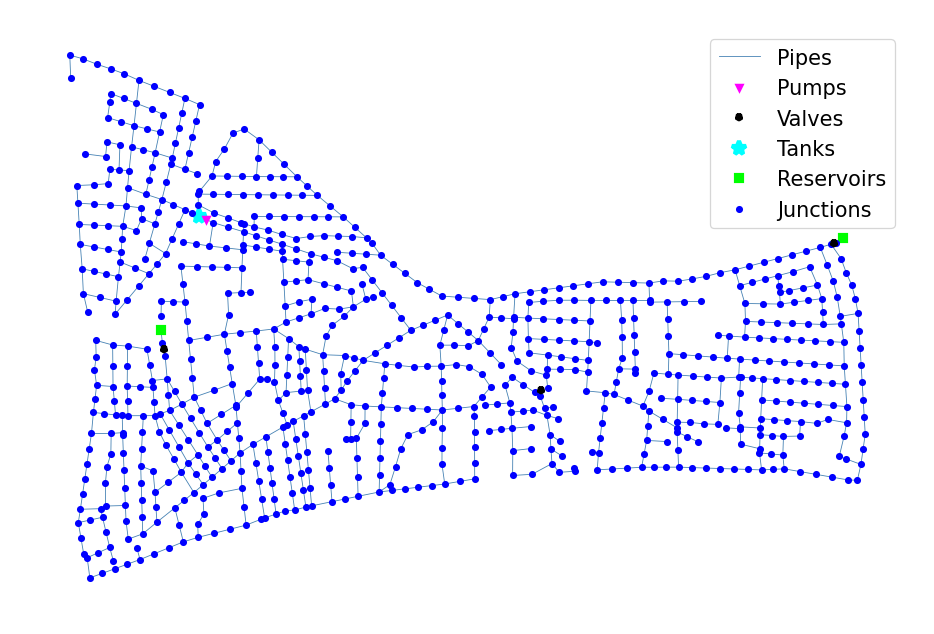

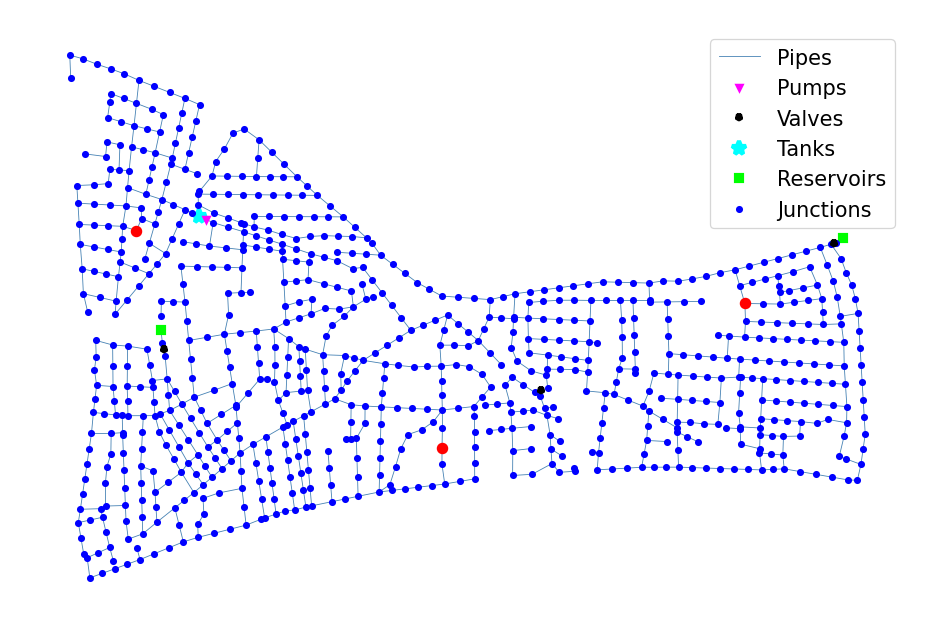

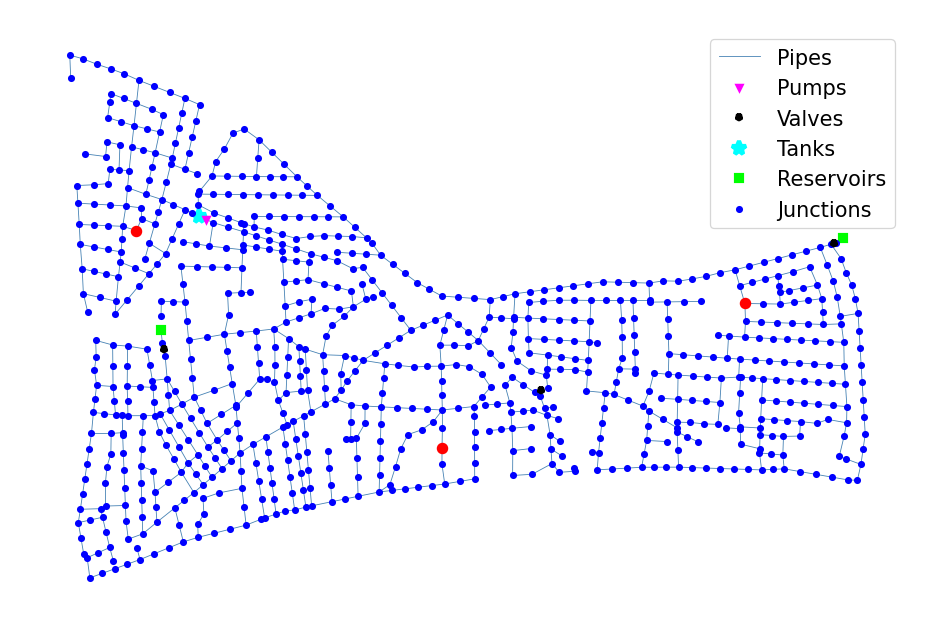

In [8]:
# For a simple plot, use G.plot. 
G.plot()
# Highlight specific nodes
G.plot(highlightnode=['n616', 'n281', 'n31'])

## Getting information from links (pipes, pumps, valves)


![Alt text](images/statistics.jpeg)


In [9]:
linkCount = G.getLinkCount()
print("linkCount = ",linkCount)
pipeCount = G.getLinkPipeCount()
print("pipeCount = ",pipeCount)
pumpCount = G.getLinkPumpCount()
print("pumpCount = ",pumpCount)
valveCount = G.getLinkValveCount()
print("valveCount = ",valveCount)

linkCount =  909
pipeCount =  905
pumpCount =  1
valveCount =  3


![Alt text](images/third.jpeg)

In [10]:
diameters = G.getLinkDiameter()
print("diameters = ",diameters)
pipelength = G.getLinkLength([1,2,3])
print("pipelength = ",pipelength)
LinkNameID = G.getLinkNameID()
print("LinkNameID = ",LinkNameID)
PipeNameID = G.getLinkPipeNameID()
print("PipeNameID = ",PipeNameID)
PumpNameID = G.getLinkPumpNameID()
print("PumpNameID = ",PumpNameID)
ValveNameID = G.getLinkValveNameID()
print("ValveNameID = ",ValveNameID)

diameters =  [200. 150. 200. 100. 100. 100. 100. 100. 150. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 150. 100. 100. 200. 150. 100. 100.
 100. 100. 100. 100. 100. 100. 200. 100. 100. 100. 100. 100. 100. 100.
 150. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 150. 150. 150. 150. 150.  63.  63. 150. 100.  75. 100. 100. 100.
 100.  63. 150. 150. 150. 150. 150. 160. 160. 100. 100. 100. 100. 100.
 100. 100. 160. 100. 100. 150. 100. 100. 150. 100. 100. 200. 100.  63.
 150. 100. 100. 100. 100. 150. 100. 150. 150. 150. 100. 150. 150. 100.
 100. 150. 100. 100. 100. 150. 100. 150. 100. 100. 160. 100. 100. 100.
 160. 100. 160. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 150. 100. 100. 100. 100. 100. 100. 100. 150. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 200.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100

## Getting information from nodes (junctions, tanks, reservoirs)
![Alt text](images/nodeinfo.jpeg)

In [11]:
nodeCount = G.getNodeCount()
print("nodeCount = ",nodeCount)
junctionCount = G.getNodeJunctionCount()
print("junctionCount = ",junctionCount)
tankCount = G.getNodeTankCount()
print("tankCount = ",tankCount)
reservoirCount = G.getNodeReservoirCount()
print("reservoirCount = ",reservoirCount)
elevations = G.getNodeElevations([1, 2, 3])
print("elevations = ",elevations)
nodeID = G.getNodeNameID()
print("nodeID = ",nodeID)
junctionID = G.getNodeJunctionNameID()
print("junctionID = ",junctionID)
tankID = G.getNodeTankNameID()
print("tankID = ",tankID)
reservoirID = G.getNodeReservoirNameID()
print("reservoirID = ",reservoirID)

## Try it yourself below


nodeCount =  785
junctionCount =  782
tankCount =  1
reservoirCount =  2
elevations =  [73.21050262 73.873703   73.17819977]
nodeID =  ['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30', 'n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n40', 'n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n50', 'n51', 'n52', 'n53', 'n54', 'n55', 'n56', 'n57', 'n58', 'n59', 'n60', 'n61', 'n62', 'n63', 'n64', 'n65', 'n66', 'n67', 'n68', 'n69', 'n70', 'n71', 'n72', 'n73', 'n74', 'n75', 'n76', 'n77', 'n78', 'n79', 'n80', 'n81', 'n82', 'n83', 'n84', 'n85', 'n86', 'n87', 'n88', 'n89', 'n90', 'n91', 'n92', 'n93', 'n94', 'n95', 'n96', 'n97', 'n98', 'n99', 'n100', 'n101', 'n102', 'n103', 'n104', 'n105', 'n106', 'n107', 'n108', 'n109', 'n110', 'n111', 'n112', 'n113', 'n114', 'n115', 'n116', 'n117', 'n118', 'n119', 'n120', 'n121', 'n12

## Demands

![Alt text](images/demands.jpeg)

In [12]:
demandcategories = G.getNodeDemandCategoriesNumber()
print("demandcategories = ",demandcategories)
demands = G.getNodeBaseDemands()
print("demands = ",demands)
demandscategory1 = G.getNodeBaseDemands(1) # Get categories 1
print("demandscategory1 = ",demandscategory1)

NodeIndex = G.getNodeIndex('n661')   #Retrieves the node index given the ID label of the node
print("NodeIndex = ",NodeIndex)
G.getNodeBaseDemands(NodeIndex)   #Get node base demand with categories for specific node index
print("G.getNodeBaseDemands(NodeIndex)   = ",G.getNodeBaseDemands(NodeIndex)  )

demandcategories =  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

## Change parameters in network

### Change diameter

In [13]:
#change pipe diameter
d4 = G.getLinkDiameter(4)
print("d4 = ",d4)
diameters = G.getLinkDiameter()
print("diameters = ",diameters)
diameters[4-1] = 200
print("diameters[4] = ",diameters[4-1])
G.setLinkDiameter(diameters)
d4new = G.getLinkDiameter(4)
print("d4new = ",d4new)

d4 =  100.0
diameters =  [200. 150. 200. 100. 100. 100. 100. 100. 150. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 150. 100. 100. 200. 150. 100. 100.
 100. 100. 100. 100. 100. 100. 200. 100. 100. 100. 100. 100. 100. 100.
 150. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 150. 150. 150. 150. 150.  63.  63. 150. 100.  75. 100. 100. 100.
 100.  63. 150. 150. 150. 150. 150. 160. 160. 100. 100. 100. 100. 100.
 100. 100. 160. 100. 100. 150. 100. 100. 150. 100. 100. 200. 100.  63.
 150. 100. 100. 100. 100. 150. 100. 150. 150. 150. 100. 150. 150. 100.
 100. 150. 100. 100. 100. 150. 100. 150. 100. 100. 160. 100. 100. 100.
 160. 100. 160. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 150. 100. 100. 100. 100. 100. 100. 100. 150. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 200.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 1

### Change elevation

In [14]:
#change node elevation
e4 = G.getNodeElevations(4)
print("e4 = ",e4)
elevations = G.getNodeElevations()
print("elevations = ",elevations)
elevations[4] = 70
print("elevations[4]  = ",elevations[4] )
G.setNodeElevations(elevations)
e4new = G.getNodeElevations(5)
print("e4new = ",e4new)

e4 =  68.26080322265625
elevations =  [ 73.21050262  73.873703    73.17819977  68.26080322  65.56950378
  70.90950012  75.91750336  64.48329926  69.26260376  74.34690094
  63.05879974  68.22740173  61.99010086  68.58049774  70.94920349
  68.79859924  60.59349823  67.14199829  73.36260223  65.95490265
  59.68489838  76.11730194  64.2052002   67.82170105  58.97169876
  61.63050079  65.77629852  61.40470123  71.54290009  75.32990265
  65.00589752  71.15899658  60.59019852  65.84819794  59.62580109
  70.19589996  63.91719818  58.57939911  62.97909927  60.20930099
  69.2960968   61.06349945  61.85850143  66.11769867  62.59889984
  38.87810135  38.70280075  40.11349869  34.86650085  44.7173996
  29.85079956  33.21060181  29.12849998  36.67179871  43.70439911
  32.70190048  34.5788002   30.10169983  40.54399872  36.54769897
  36.57139969  35.95999908  37.00709915  34.92340088  36.22439957
  34.27600098  32.50159836  41.09429932  27.77739906  29.85540009
  30.08230019  34.46730042  33.08990097


## Patterns

### Description and code for working with patterns.

In [15]:
G.getPatternCount()
print("G.getPatternCount() ->",G.getPatternCount())
PatternsNames = G.getPatternNameID()
print("PatternsNames = ",PatternsNames)
Patterns = G.getPattern()
print("Patterns = ",Patterns)

G.getPatternCount() -> 3
PatternsNames =  ['P-Residential', 'P-Commercial', 'P-Industrial']
Patterns =  [[0.77289999 0.74800003 0.72299999 ... 0.84119999 0.82010001 0.79720002]
 [0.9174     0.90530002 0.89289999 ... 0.94819999 0.93900001 0.92869997]
 [1.         0.         1.         ... 0.         1.         0.        ]]


### Plot residential pattern

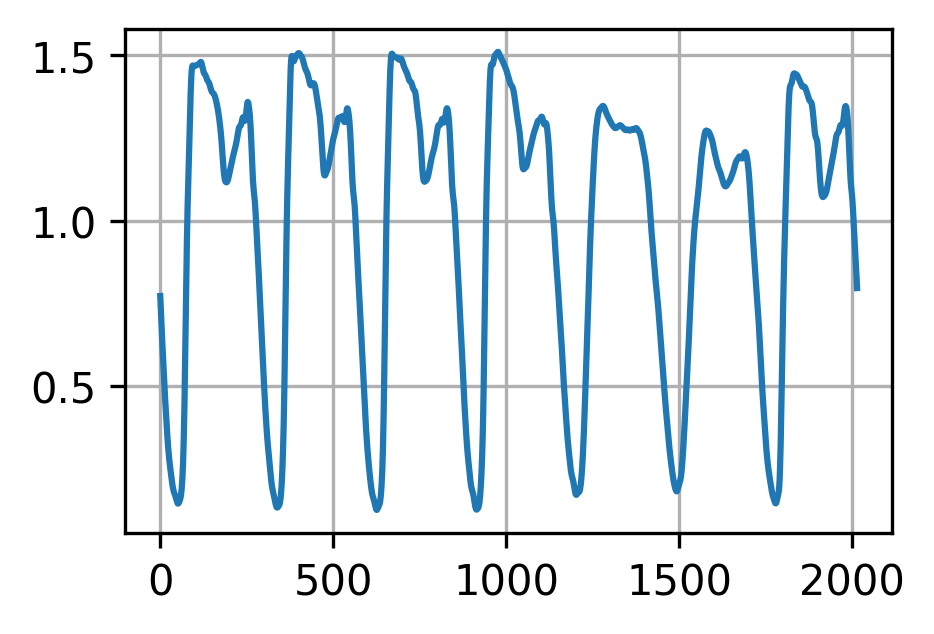

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# Create a new figure
plt.figure()

# Plot the first row of Patterns
plt.plot(Patterns[0, :])

# Turn on the grid
plt.grid(True)

# Show the plot
plt.show()

![Alt text](images/patterns.jpeg)

patternID =  yabdb
patternMult =  [0.4587     0.45265001 0.44645    ... 0.47409999 0.46950001 0.46434999]
patternIndex =  4
Patterns =  [[0.77289999 0.74800003 0.72299999 ... 0.84119999 0.82010001 0.79720002]
 [0.9174     0.90530002 0.89289999 ... 0.94819999 0.93900001 0.92869997]
 [1.         0.         1.         ... 0.         1.         0.        ]
 [0.4587     0.45265001 0.44645    ... 0.47409999 0.46950001 0.46434999]]


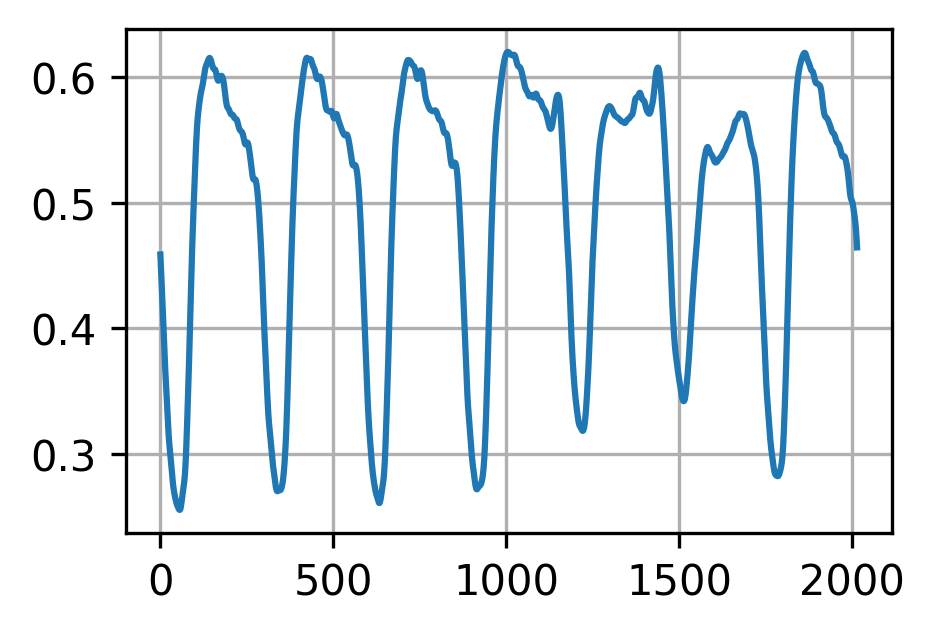

In [17]:
#adding a pattern (name is string of 5 random letters a-z)

import random
import string
# Generate a random string of 5 lowercase letters
patternID = ''.join(random.choices(string.ascii_lowercase, k=5))
print("patternID = ",patternID)

patternMult = Patterns[1, :] * 0.5
print("patternMult = ",patternMult)

patternIndex = G.addPattern(patternID, patternMult)
print("patternIndex = ",patternIndex)
Patterns = G.getPattern()
print("Patterns = ",Patterns)

#G.plot_ts()


#plot new pattern
plt.figure()

# Plot the new pattern
plt.plot(Patterns[patternIndex-1, :])

# Turn on the grid
plt.grid(True)

# Show the plot
plt.show()

## Simulation options

### Description and code for simulation options.
![Alt text](images/simulationoption.jpeg)

In [18]:
SimulationDuration = G.getTimeSimulationDuration() #in seconds
print("SimulationDuration = ",SimulationDuration)
SimulationDurationHours = SimulationDuration/3600
print("SimulationDurationHours = ",SimulationDurationHours)

HydraulicStep = G.getTimeHydraulicStep() #in seconds
print("HydraulicStep = ",HydraulicStep)
QualityStep = G.getTimeQualityStep() #in seconds
print("QualityStep = ",QualityStep)
PatternStep = G.getTimePatternStep() #in seconds
print("PatternStep = ",PatternStep)

ReportingStep = G.getTimeReportingStep() #in seconds
print("ReportingStep = ",ReportingStep)
ReportingStart = G.getTimeReportingStart()
print("ReportingStart = ",ReportingStart)
PatternStart = G.getTimePatternStart()
print("PatternStart = ",PatternStart)

SimulationDuration =  604800
SimulationDurationHours =  168.0
HydraulicStep =  300
QualityStep =  300
PatternStep =  300
ReportingStep =  300
ReportingStart =  0
PatternStart =  0


### Hydraulic options


In [19]:
Units = G.getUnits()
print("Units = ",Units)
FlowUnits = G.getFlowUnits()
print("FlowUnits = ",FlowUnits)
PressureUnits = G.NodePressureUnits()
print("PressureUnits = ",PressureUnits)
HeadLossFormula = G.getOptionsHeadLossFormula()
print("HeadLossFormula = ",HeadLossFormula)

Units =  <epyt.epanet.EpytValues object at 0x00000234FF260670>
FlowUnits =  CMH
PressureUnits =  meters
PressureUnits =  meters
HeadLossFormula =  HW


### Setup quality options 


In [20]:
G.setQualityType('chlorine','mg/L') #set quality type

zeroNodes = np.zeros(G.NodeCount)
print("zeroNodes = ",zeroNodes)
G.setNodeInitialQuality(zeroNodes) #setting initial chlorine level at 0  mg/L

brk = -0.3 * np.ones(G.LinkCount)
print("brk = ",brk)
G.setLinkBulkReactionCoeff(brk) #setting Bulk Reaction Coefficient

wrk = -0.1 * np.ones(G.LinkCount)
print("wrk = ",wrk)
G.setLinkWallReactionCoeff(wrk) #setting Pipe wall Reaction Coefficient

BulkReactionOrder = G.getOptionsPipeBulkReactionOrder()
print("BulkReactionOrder = ",BulkReactionOrder)
PipeWallReactionOrder = G.getOptionsPipeWallReactionOrder()
print("PipeWallReactionOrder = ",PipeWallReactionOrder)

zeroNodes =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

![Alt text](images/setupqualityoptions2.jpeg)   

In [21]:
ReservoirsIndex = G.getNodeReservoirIndex()
print("ReservoirsIndex = ",ReservoirsIndex)

help(G.setNodeSourceType)

for i in ReservoirsIndex:
    G.setNodeSourceType(i, 'CONCEN')
    G.setNodeSourceQuality(i, 0.8)


NodeSourceQuality = G.getNodeSourceQuality(ReservoirsIndex)
print("NodeSourceQuality = ",NodeSourceQuality)

ReservoirsIndex =  [783, 784]
Help on method setNodeSourceType in module epyt.epanet:

setNodeSourceType(index, value) method of epyt.epanet.epanet instance
    Sets the values of quality source type.
    
    Types of external water quality sources that can be set:
      1) CONCEN      Sets the concentration of external inflow entering a node
      2) MASS        Injects a given mass/minute into a node
      3) SETPOINT    Sets the concentration leaving a node to a given value
      4) FLOWPACED   Adds a given value to the concentration leaving a node
    
    Example:
    
    >>> nodeIndex = 1
    >>> d.getNodeSourceType(nodeIndex)                 # Retrieves the quality source type of the 1st node
    >>> sourceType = 'MASS'
    >>> d.setNodeSourceType(nodeIndex, sourceType)     # Sets the quality source type = 'MASS' to the 1st node
    >>> d.getNodeSourceType(nodeIndex)
    
    See also getNodeSourceType, setNodeSourceQuality, setNodeSourcePatternIndex.

NodeSourceQuality =  [0.